   # LEAD SCORING - ASSIGNMENT
                                                           - Joshly Mary Johnson
                                                           - Tariq Mohammed

## Problem Statement
An education company named X Education sells online courses to industry professionals.The company 
markets its courses on several websites and search engines like Google. Once these people land on the 
website, they might browse the courses or fill up a form for the course or watch some videos. When 
these people fill up a form providing their email address or phone number, they are classified to be a 
lead. Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, 
say, they acquire 100 leads in a day, only about 30 of them are converted.

What needs to be done?
- X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. 
- The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 

In [1]:
# Importing python libraries for data pre precessing and visualization
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Understanding the data

Let's read the data and understand the basic information that the data comprises of.

#### Read the data

In [2]:
lead_score = pd.read_csv("Leads.csv")
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Let's inspect the shape of the dataframe
lead_score.shape

(9240, 37)

In [4]:
# Statistic aspects of the dataframe
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Inspecting the type of each column
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Data Cleaning

#### Handling missing values

Among the data, we can observe that some data is provided by the people taking the survey and few columns are concluded by the sales team. As we are analysing the response of the customers, we can drop the columns that are generated by the sales team. The following are the fields:
- Last Activity
- Last notable activity
- Lead Profile
- Tags
- Lead quality
- Asymmetrique Activity Index
- Asymmetrique Activity Score
- Asymmetrique Profile Index
- Asymmetrique Profile Score

In [6]:
# Dropping columns which were provided by the sales team
sales_cols = ['Last Activity', 'Last Notable Activity', 'Lead Profile', 'Tags', 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Asymmetrique Profile Score']
lead_score_prep = lead_score.drop(sales_cols, axis=1)

In [7]:
# Checking for missing values in columns
lead_score_prep.isnull().mean().sort_values(ascending=False)*100

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Lead Source                                       0.389610
Digital Advertisement                             0.000000
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
X Education Forums                                0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.000000
Newspaper                                         0.0000

In [8]:
# Dropping columns with more than 40% missing values
lead_score_prep = lead_score_prep.loc[:, lead_score.isnull().mean() < 0.4]
lead_score_prep.isnull().mean().sort_values(ascending = False)

What matters most to you in choosing a course    0.293182
What is your current occupation                  0.291126
Country                                          0.266342
How did you hear about X Education               0.238853
Specialization                                   0.155628
City                                             0.153680
TotalVisits                                      0.014827
Page Views Per Visit                             0.014827
Lead Source                                      0.003896
Digital Advertisement                            0.000000
Through Recommendations                          0.000000
Receive More Updates About Our Courses           0.000000
X Education Forums                               0.000000
Update me on Supply Chain Content                0.000000
Get updates on DM Content                        0.000000
I agree to pay the amount through cheque         0.000000
Newspaper                                        0.000000
Prospect ID   

In [9]:
# Checking count of missing values
print(lead_score_prep.loc[:, lead_score_prep.isnull().mean() > 0].isnull().sum().sort_values(ascending = False))
print("____________________")
print(lead_score_prep.loc[:, lead_score_prep.isnull().mean() > 0].isnull().mean().sort_values(ascending = False)*100)

What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Lead Source                                        36
dtype: int64
____________________
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Lead Sou

#### Checking for data imbalance

In [10]:
print(lead_score_prep['What matters most to you in choosing a course'].value_counts(normalize = True)*100)
print("____________________")
print(lead_score_prep['What matters most to you in choosing a course'].value_counts())

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64
____________________
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


In [11]:
print(lead_score_prep['What is your current occupation'].value_counts(normalize = True)*100)
print("____________________")
print(lead_score_prep['What is your current occupation'].value_counts())

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64
____________________
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


In [12]:
print(lead_score_prep['Country'].value_counts(normalize = True)*100)
print("____________________")
print(lead_score_prep['Country'].value_counts())

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

In [13]:
print(lead_score_prep['How did you hear about X Education'].value_counts(normalize = True)*100)
print("____________________")
print(lead_score_prep['How did you hear about X Education'].value_counts())

Select                   71.704820
Online Search            11.488696
Word Of Mouth             4.948102
Student of SomeSchool     4.407792
Other                     2.644675
Multiple Sources          2.161240
Advertisements            0.995308
Social Media              0.952652
Email                     0.369686
SMS                       0.327030
Name: How did you hear about X Education, dtype: float64
____________________
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64


In [14]:
print(lead_score_prep['Specialization'].value_counts(normalize = True)*100)
print("____________________")
print(lead_score_prep['Specialization'].value_counts())

Select                               24.891054
Finance Management                   12.509613
Human Resource Management            10.869008
Marketing Management                 10.740836
Operations Management                 6.447065
Business Administration               5.165342
IT Projects Management                4.691105
Supply Chain Management               4.473212
Banking, Investment And Insurance     4.332223
Travel and Tourism                    2.601897
Media and Advertising                 2.601897
International Business                2.281466
Healthcare Management                 2.037939
Hospitality Management                1.461164
E-COMMERCE                            1.435529
Retail Management                     1.281723
Rural and Agribusiness                0.935658
E-Business                            0.730582
Services Excellence                   0.512689
Name: Specialization, dtype: float64
____________________
Select                               1942
Finance

In [15]:
print(lead_score_prep['City'].value_counts(normalize = True)*100)
print("____________________")
print(lead_score_prep['City'].value_counts())

Mumbai                         41.202046
Select                         28.759591
Thane & Outskirts               9.616368
Other Cities                    8.772379
Other Cities of Maharashtra     5.843990
Other Metro Cities              4.859335
Tier II Cities                  0.946292
Name: City, dtype: float64
____________________
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64


In [16]:
print(lead_score_prep['Do Not Email'].value_counts(normalize = True)*100)
print("___________________________")
print(lead_score_prep['Do Not Call'].value_counts(normalize = True)*100)
print("___________________________")
print(lead_score_prep['Search'].value_counts(normalize = True)*100)
print("___________________________")
print(lead_score_prep['Magazine'].value_counts(normalize = True)*100)
print("___________________________")
print(lead_score_prep['Newspaper Article'].value_counts(normalize = True)*100)
print("___________________________")
print(lead_score_prep['X Education Forums'].value_counts(normalize = True)*100)
print("___________________________")
print(lead_score_prep['Newspaper'].value_counts(normalize = True)*100)
print("___________________________")
print(lead_score_prep['Digital Advertisement'].value_counts(normalize = True)*100)
print("___________________________")
print(lead_score_prep['Through Recommendations'].value_counts(normalize = True)*100)
print("___________________________")
print(lead_score_prep['Receive More Updates About Our Courses'].value_counts(normalize = True)*100)
print("___________________________")
print(lead_score_prep['Update me on Supply Chain Content'].value_counts(normalize = True)*100)
print("___________________________")
print(lead_score_prep['Get updates on DM Content'].value_counts(normalize = True)*100)
print("___________________________")
print(lead_score_prep['I agree to pay the amount through cheque'].value_counts(normalize = True)*100)
print("___________________________")
print(lead_score_prep['A free copy of Mastering The Interview'].value_counts(normalize = True)*100)
print("___________________________")


No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64
___________________________
No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64
___________________________
No     99.848485
Yes     0.151515
Name: Search, dtype: float64
___________________________
No    100.0
Name: Magazine, dtype: float64
___________________________
No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64
___________________________
No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64
___________________________
No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64
___________________________
No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64
___________________________
No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64
___________________________
No    100.0
Name: Receive More Updates About Our Courses, dtype: float64
___________________________
No    100.0
Name: Update me on Su

We can observe from above that few of the columns have high imbalance. Hence we'll drop them.

In [17]:
# Dropping columns having data imbalance more than 85%
varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Country','What matters most to you in choosing a course']
lead_score_prep.drop(varlist,inplace=True,axis=1)
lead_score_prep.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,How did you hear about X Education,What is your current occupation,City,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Select,Select,Unemployed,Select,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Select,Select,Unemployed,Select,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Select,Student,Mumbai,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Word Of Mouth,Unemployed,Mumbai,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Select,Other,Unemployed,Mumbai,No


In [18]:
# Checking the dataframe
lead_score_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9204 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Specialization                          7802 non-null   object 
 9   How did you hear about X Education      7033 non-null   object 
 10  What is your current occupation         6550 non-null   obje

From the above analysis, we can also observe that few categorical columns have multiple categories that have very few rows. Considering them as such could skew our result. For easier analysis, we will club the categories that have very less rows.

In [19]:
# Checking Lead source
lead_score_prep["Lead Source"].value_counts(normalize=True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

In [20]:
#Combining categories having less rows into single category 'Other'
lead_score_prep["Lead Source"] = lead_score_prep["Lead Source"].replace(["Facebook","bing","Click2call","Press_Release","Social Media","Live Chat","youtubechannel","testone","Pay per Click Ads","welearnblog_Home","WeLearn","blog","NC_EDM","Welingak Website","Referral Sites"],"Other")
lead_score_prep["Lead Source"] = lead_score_prep["Lead Source"].replace(["google"],"Google")
lead_score_prep["Lead Source"].value_counts(normalize=True)*100

Google            31.214689
Direct Traffic    27.629292
Olark Chat        19.067797
Organic Search    12.538027
Reference          5.801825
Other              3.748370
Name: Lead Source, dtype: float64

In [21]:
#Combining categories having less rows into single category 'Other'
lead_score_prep["How did you hear about X Education"] = lead_score_prep["How did you hear about X Education"].replace(["Advertisements","Social Media","Email","SMS","Multiple Sources"],"Other")
lead_score_prep["How did you hear about X Education"].value_counts(normalize=True)*100

Select                   71.704820
Online Search            11.488696
Other                     7.450590
Word Of Mouth             4.948102
Student of SomeSchool     4.407792
Name: How did you hear about X Education, dtype: float64

In [22]:
# Checking for Lead Origin
lead_score_prep["Lead Origin"].value_counts(normalize=True)*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

#### Imputing values

In [23]:
# As there a lot of missing values in a few columns, creating a new category 'NA' for the missing values
missing_cols = ['What is your current occupation', 'How did you hear about X Education', 'Specialization', 'City']
len(missing_cols)
for col in missing_cols:
    lead_score_prep[col].fillna('NA', inplace = True)

In [24]:
# Dropping all null rows
lead_score_prep = lead_score_prep.dropna(axis = 0, how ='any')

In [25]:
# Checking count of missing values
print(lead_score_prep.loc[:, lead_score_prep.isnull().mean() > 0].isnull().sum().sort_values(ascending = False))
print("____________________")
print(lead_score_prep.loc[:, lead_score_prep.isnull().mean() > 0].isnull().mean().sort_values(ascending = False)*100)

Series([], dtype: float64)
____________________
Series([], dtype: float64)


In [26]:
# Changing values of columns which have values 'Select' or 'Unknown' to NA
lead_score_prep['How did you hear about X Education'] = lead_score_prep['How did you hear about X Education'].replace(['Select'], 'NA')
lead_score_prep.Specialization = lead_score_prep.Specialization.replace(['Select'], 'NA')
lead_score_prep.City = lead_score_prep.City.replace(['Select'], 'NA')

In [27]:
print(lead_score_prep['How did you hear about X Education'].value_counts(normalize = True)*100)
print("____________________")
print(lead_score_prep['Specialization'].value_counts(normalize = True)*100)
print("____________________")
print(lead_score_prep['City'].value_counts(normalize = True)*100)
print("____________________")

NA                       78.091250
Online Search             8.904562
Other                     5.763721
Word Of Mouth             3.824113
Student of SomeSchool     3.416354
Name: How did you hear about X Education, dtype: float64
____________________
NA                                   36.169275
Finance Management                   10.568658
Human Resource Management             9.224157
Marketing Management                  9.069870
Operations Management                 5.499229
Business Administration               4.397179
IT Projects Management                4.033502
Supply Chain Management               3.813092
Banking, Investment And Insurance     3.691867
Travel and Tourism                    2.226141
Media and Advertising                 2.226141
International Business                1.939608
Healthcare Management                 1.719198
E-COMMERCE                            1.223275
Hospitality Management                1.223275
Retail Management                     1.10

In [28]:
# Checking null count
lead_score_prep.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Specialization                            0
How did you hear about X Education        0
What is your current occupation           0
City                                      0
A free copy of Mastering The Interview    0
dtype: int64

So now we do not have any missing values

In [29]:
lead_score_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Number                             9074 non-null   int64  
 2   Lead Origin                             9074 non-null   object 
 3   Lead Source                             9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Specialization                          9074 non-null   object 
 9   How did you hear about X Education      9074 non-null   object 
 10  What is your current occupation         9074 non-null   obje

Let us see how many rows do we have now.

In [30]:
lead_score_prep.shape

(9074, 13)

In [31]:
rows_retained = (9074/9240)*100
rows_retained

98.2034632034632

We have retained 98% of the rows ensuring that the data is still intact.

# Data visualization

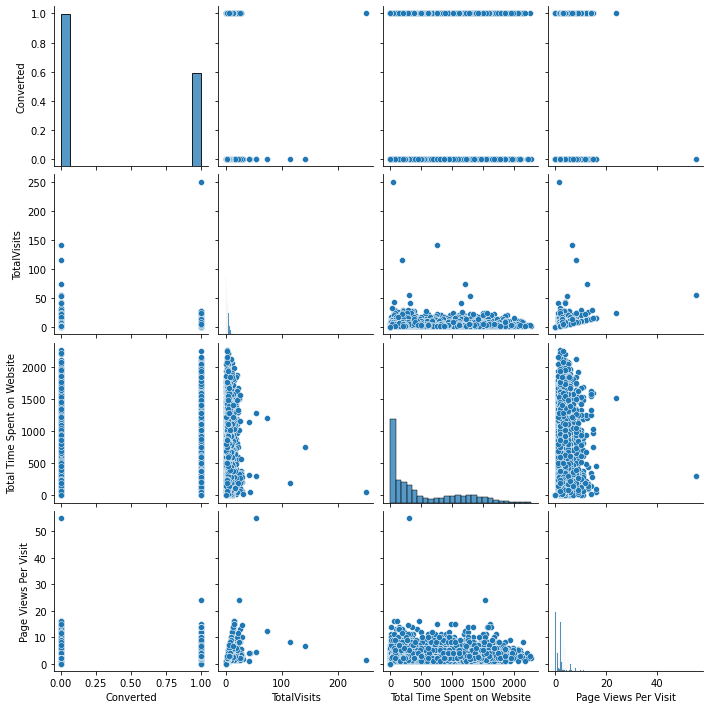

In [32]:
# Visualization of numerical data
sns.pairplot(lead_score_prep[['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
plt.show()

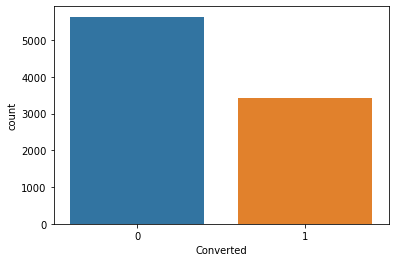

In [33]:
# Plotting the target variable
sns.countplot('Converted', data=lead_score_prep)
plt.show()

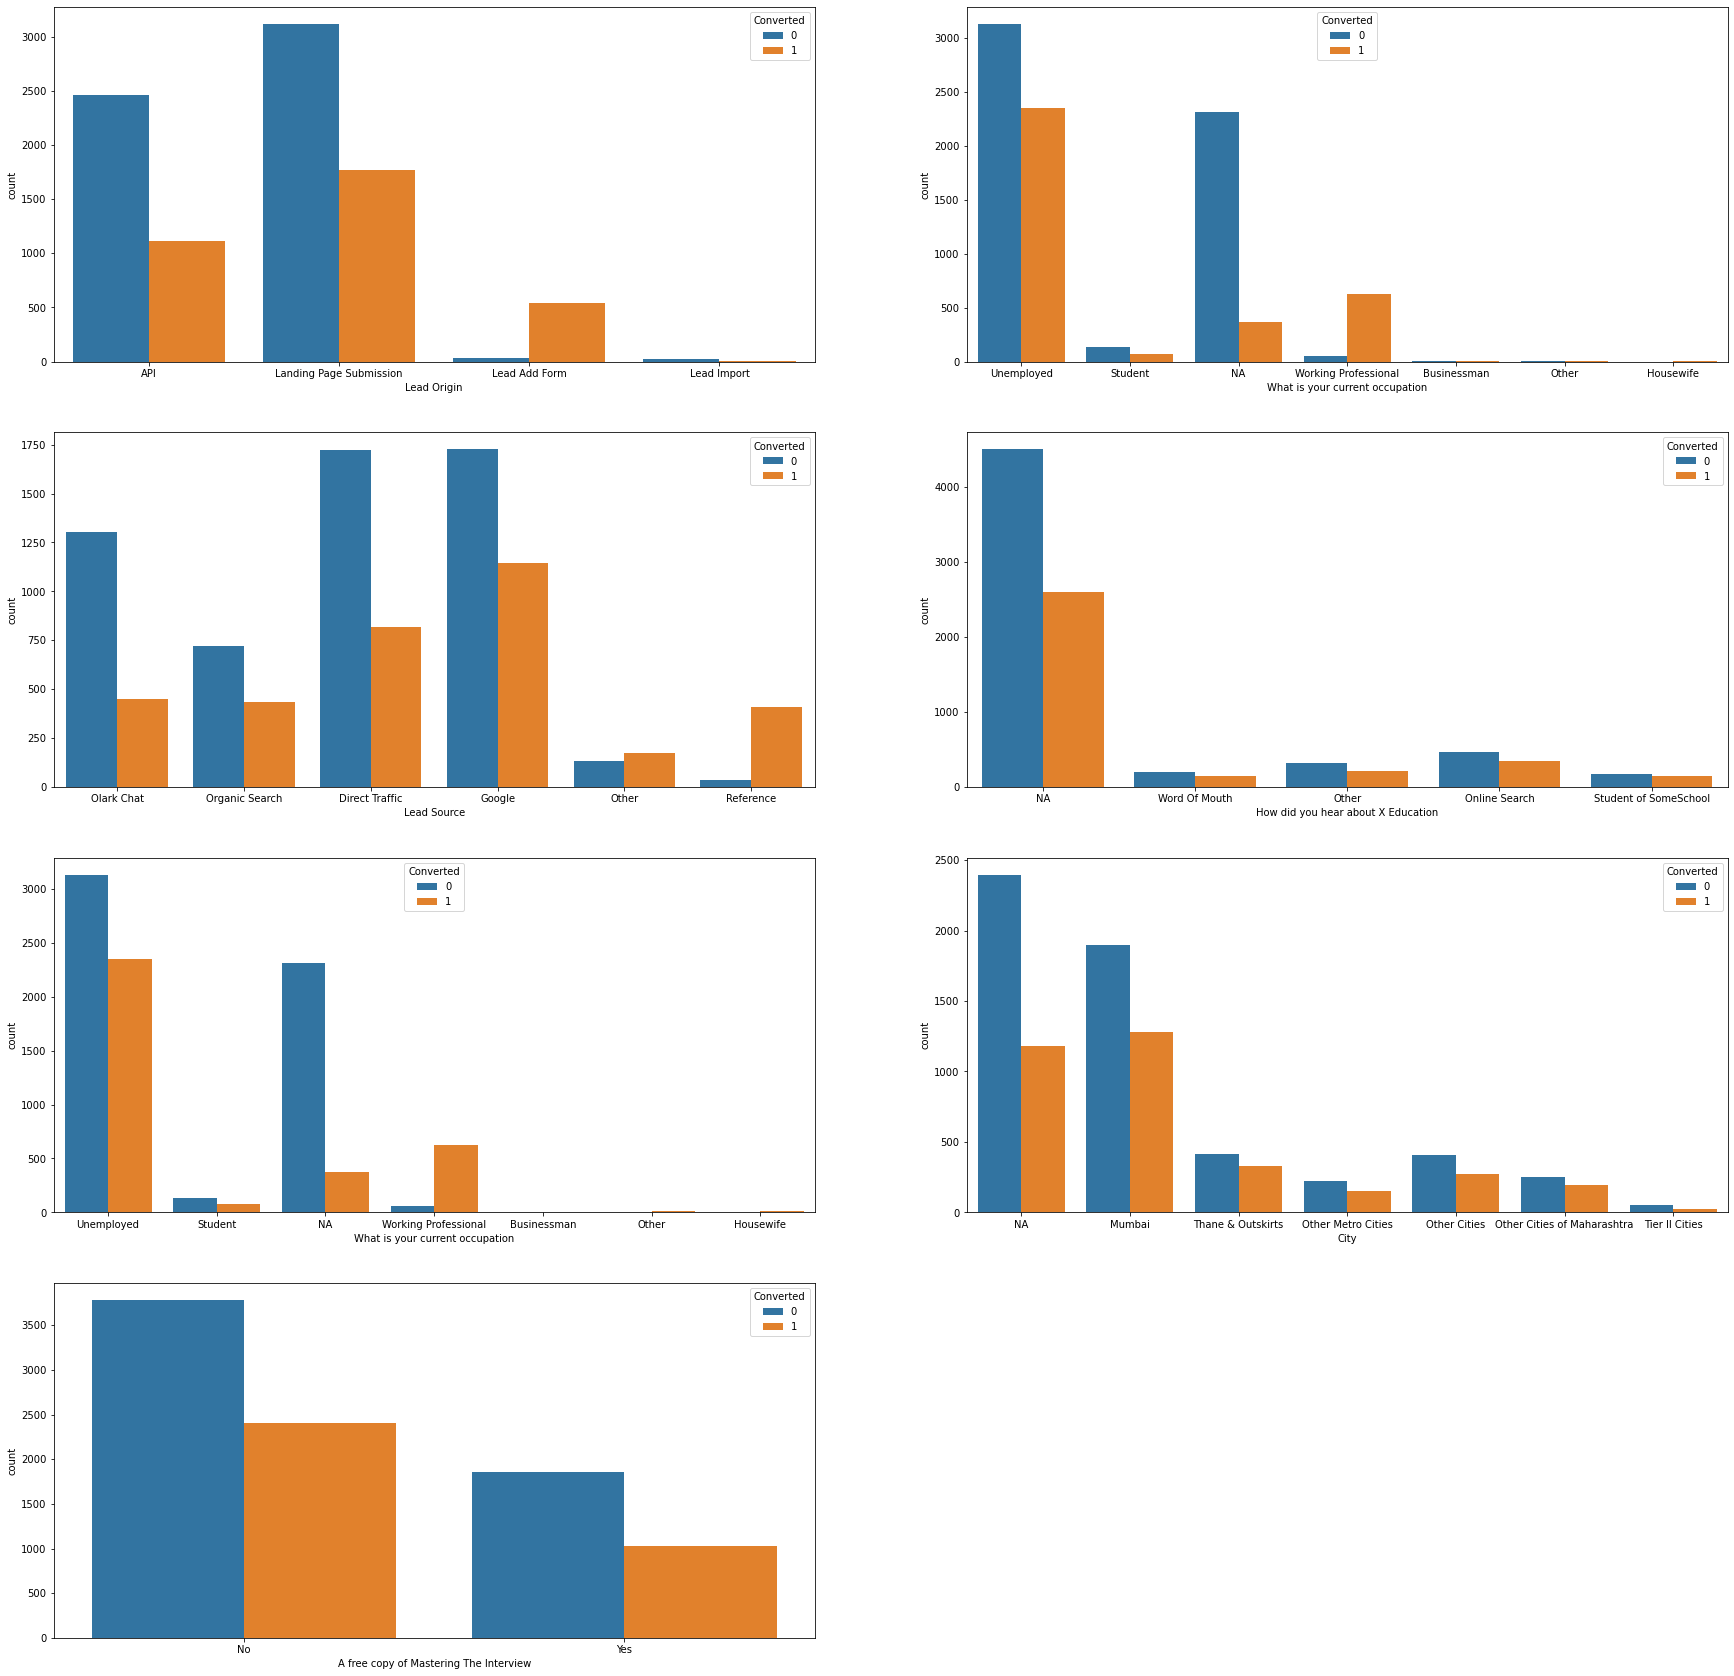

In [34]:
# Visualization of categorical data
plt.figure(figsize=(30, 30))
plt.subplot(4, 2, 1)
sns.countplot(x='Lead Origin', hue='Converted', data=lead_score_prep)
plt.subplot(4, 2, 2)
sns.countplot(x='What is your current occupation', hue='Converted', data=lead_score_prep)
plt.subplot(4, 2, 3)
sns.countplot(x='Lead Source', hue='Converted', data=lead_score_prep)
plt.subplot(4, 2, 4)
sns.countplot(x='How did you hear about X Education', hue='Converted', data=lead_score_prep)
plt.subplot(4, 2, 5)
sns.countplot(x='What is your current occupation', hue='Converted', data=lead_score_prep)
plt.subplot(4, 2, 6)
sns.countplot(x='City', hue='Converted', data=lead_score_prep)
plt.subplot(4, 2, 7)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data=lead_score_prep)
plt.show()

#### Checking for Outliers

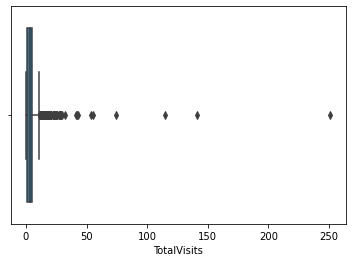

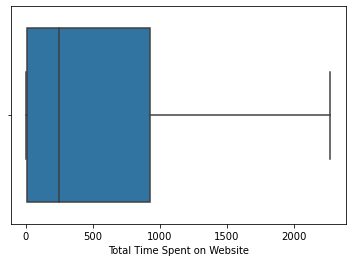

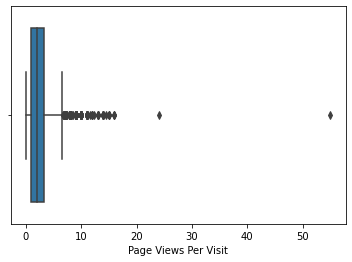

In [35]:
# Plotting for numerical variables
num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
for var in num_vars:
    sns.boxplot(lead_score_prep[var])
    plt.show()

We can observe here that TotalVisits and Pages Views per visit both have very few outliers which are not very drastic values. Hence we can ignore them.

# Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [36]:
lead_score_prep["A free copy of Mastering The Interview"] = lead_score_prep["A free copy of Mastering The Interview"].apply(lambda x:1 if x=='Yes' else 0)

#### Creating dummy variables for categorical variables

In [37]:
lead_score_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Number                             9074 non-null   int64  
 2   Lead Origin                             9074 non-null   object 
 3   Lead Source                             9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Specialization                          9074 non-null   object 
 9   How did you hear about X Education      9074 non-null   object 
 10  What is your current occupation         9074 non-null   obje

In [38]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_score_prep[['Lead Origin', 'Lead Source', 'How did you hear about X Education']], drop_first=True)

# Adding the results to the master dataframe
lead_score_prep = pd.concat([lead_score_prep, dummy1], axis=1)
lead_score_prep.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Other', 'Lead Source_Reference',
       'How did you hear about X Education_Online Search',
       'How did you hear about X Education_Other',
       'How did you hear about X Education_Student of SomeSchool',
       'How did you hear about X Education_Word Of Mouth'],
      dtype='object')

In [39]:
# Creating variables for the other categorical variables that have NA as category and dropping the dummy var that has NA.
# Specialization
sd = pd.get_dummies(lead_score_prep['Specialization'], prefix = 'Specialization')
# Dropping Specialization_NA 
sd1 = sd.drop(['Specialization_NA'], 1)
#Adding the results to the master dataframe
lead_score_prep = pd.concat([lead_score_prep,sd1], axis=1)

# What is your current occupation
od = pd.get_dummies(lead_score_prep['What is your current occupation'], prefix = 'What is your current occupation')
# Dropping What is your current occupation_NA column
od1 = od.drop(['What is your current occupation_NA'], 1)
#Adding the results to the master dataframe
lead_score_prep = pd.concat([lead_score_prep,od1], axis=1)

# City
cd = pd.get_dummies(lead_score_prep['City'], prefix = 'City')
# Dropping City_NA phone service column
cd1 = cd.drop(['City_NA'], 1)
#Adding the results to the master dataframe
lead_score_prep = pd.concat([lead_score_prep,cd1], axis=1)

lead_score_prep.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Other', 'Lead Source_Reference',
       'How did you hear about X Education_Online Search',
       'How did you hear about X Education_Other',
       'How did you hear about X Education_Student of SomeSchool',
       'How did you hear about X Education_Word Of Mouth',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance M

In [40]:
# Now that we have created the dummy variables, we can delete the original columns which are now repeated columns
lead_score_prep.drop(['Lead Origin', 'Lead Source', 'Specialization', 'How did you hear about X Education', 'What is your current occupation','City','A free copy of Mastering The Interview'],inplace=True, axis=1)
lead_score_prep.columns

Index(['Prospect ID', 'Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Other', 'Lead Source_Reference',
       'How did you hear about X Education_Online Search',
       'How did you hear about X Education_Other',
       'How did you hear about X Education_Student of SomeSchool',
       'How did you hear about X Education_Word Of Mouth',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects

#### Performing test-train split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
# dropping prospect Id variable as it is not required and the target variable and assigning to X
X = lead_score_prep.drop(['Prospect ID','Converted'],axis=1)

# adding target variable to y
y = lead_score_prep['Converted']

In [43]:
# Splitting the data to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
# We are using Standard scaler here
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3009,630949,-0.284595,-0.160255,-0.179666,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1012,649355,-0.284595,-0.540048,-0.179666,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
9226,579735,-0.671384,-0.888650,-1.132538,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4750,614238,-0.284595,1.643304,-0.179666,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7987,588625,0.295588,2.017593,0.058552,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


Let us check the conversion rate

In [46]:
conversion_rate = sum(lead_score_prep['Converted'])/len(lead_score_prep['Converted'])*100
conversion_rate

37.85541106458012

We have almost 38% conversion rate.

Looking at correlations

In [47]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

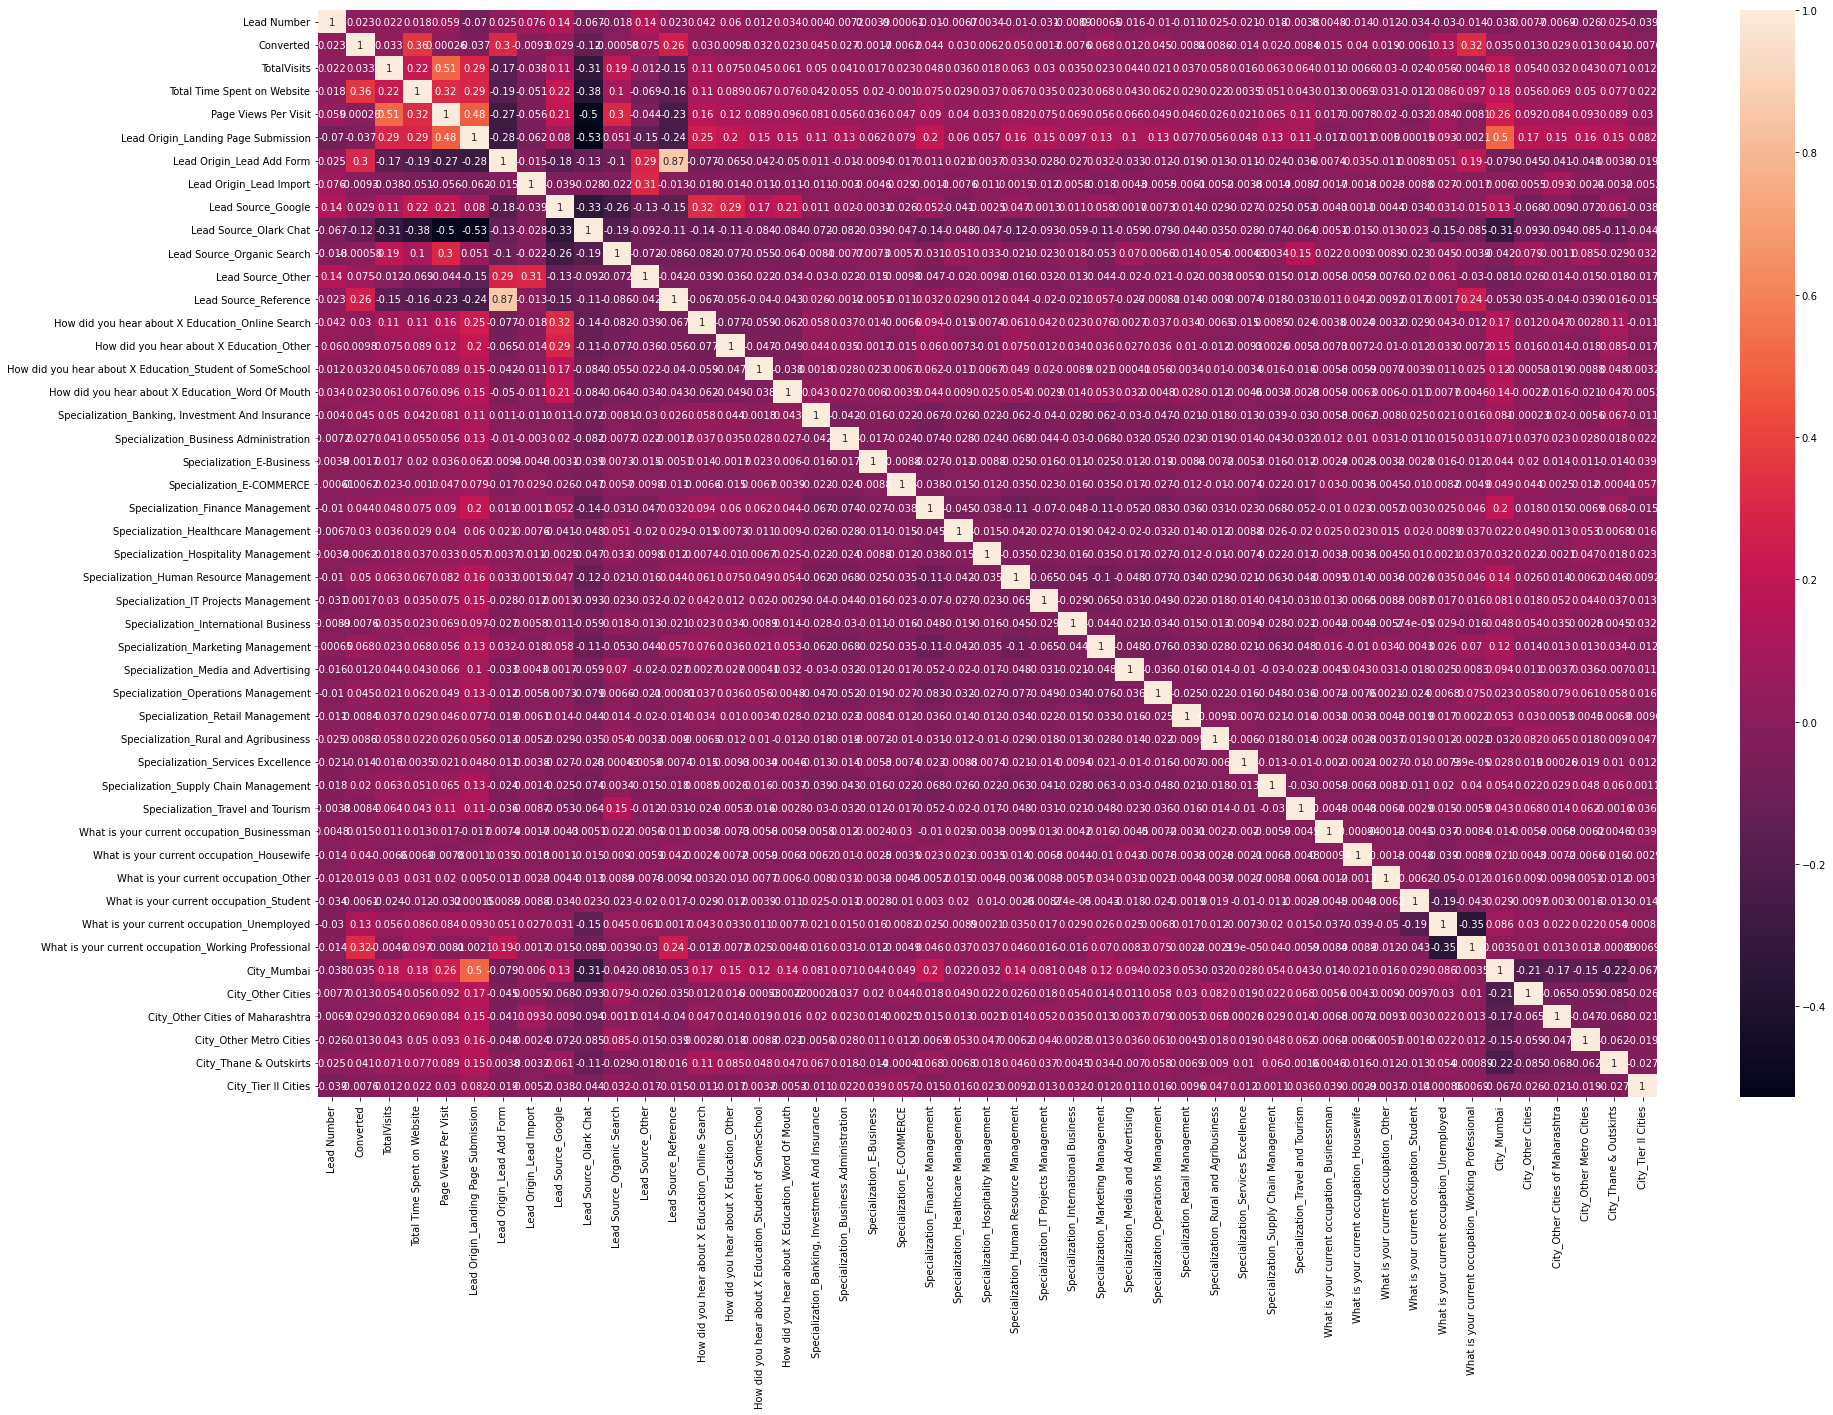

In [48]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(lead_score_prep.corr(),annot = True)
plt.show()

# Data Modelling

Let us create our first model which is a simple model without any specifications

#### Model 1

In [49]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           46
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2831.3
Date:                Tue, 18 Oct 2022   Deviance:                       5662.7
Time:                        22:06:42   Pearson chi2:                 6.61e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3569
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                       -3.9318      0.928     -4.236      0.000      -5.751      -2.112
Lead Number                                               2.271e-06   1.48e-06      1.530      0.126   -6.37e-07    5.18e-06
TotalVisits                                                  0.1098      0.043      2.581      0.010       0.026       0.193
Total Time Spent on Website                                  1.1315      0.039     28.677      0.000       1.054       1.209
Page Views Per Visit                                        -0.0434      0.048     -0.910      0.363      -0.137       0.050
Lead Origin_Landing Page Submission                         -0.8559      0.147     -5.841      0.000      -1.143      -0.569
Lead Origin_Lead Add Form                                    5.4323      0.600      9.057      0.000       4.257       6.608
Lead Origin_Lead Import                                      0.8997      0.567      1.588      0.112      -0.211       2.010
Lead Source_Google                                           0.3247      0.117      2.773      0.006       0.095       0.554
Lead Source_Olark Chat                                       1.3760      0.155      8.859      0.000       1.072       1.680
Lead Source_Organic Search                                   0.2351      0.123      1.912      0.056      -0.006       0.476
Lead Source_Other                                           -0.1026      0.317     -0.324      0.746      -0.723       0.518
Lead Source_Reference                                       -1.7007      0.639     -2.661      0.008      -2.953      -0.448
How did you hear about X Education_Online Search             0.1913      0.139      1.374      0.170      -0.082       0.464
How did you hear about X Education_Other                    -0.0065      0.164     -0.039      0.969      -0.328       0.315
How did you hear about X Education_Student of SomeSchool     0.2504      0.195      1.281      0.200      -0.133       0.634
How did you hear about X Education_Word Of Mouth             0.2194      0.184      1.193      0.233      -0.141       0.580
Specialization_Banking, Investment And Insurance             0.9951      0.221      4.512      0.000       0.563       1.427
Specialization_Business Administration                       0.6842      0.220      3.108      0.002       0.253       1.116
Specialization_E-Business                                    0.8182      0.422      1.939      0.053      -0.009       1.645
Specialization_E-COMMERCE                                    0.8462      0.329      2.569      0.010       0.201       1.492
Specialization_Finance Management                            0.6860      0.182     

#### Feature selection using RFE

In [50]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [51]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 18)             # running RFE with 18 variables as output
rfe = rfe.fit(X_train, y_train)

In [52]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 28),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Other', True, 1),
 ('Lead Source_Reference', True, 1),
 ('How did you hear about X Education_Online Search', False, 7),
 ('How did you hear about X Education_Other', False, 27),
 ('How did you hear about X Education_Student of SomeSchool', False, 5),
 ('How did you hear about X Education_Word Of Mouth', False, 6),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', False, 9),
 ('Specialization_E-Business', False, 26),
 ('Specialization_E-COMMERCE', False, 13),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Healthcare Manag

In [53]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['Lead Origin_Lead Import', 'Lead Source_Google',
       'How did you hear about X Education_Online Search',
       'How did you hear about X Education_Other',
       'How did you hear about X Education_Student of SomeSchool',
       'How did you hear about X Education_Word Of Mouth',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Media and Advertising',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current

#### Model 2

In [54]:
# Assessing the model using statsmodels
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2895.0
Date:                Tue, 18 Oct 2022   Deviance:                       5790.0
Time:                        22:06:43   Pearson chi2:                 6.52e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3439
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5360      0.908     -3.894      0.000      -5.316      -1.756
Lead Number                                           2.515e-06   1.45e-06      1.736      0.083   -3.24e-07    5.35e-06
TotalVisits                                              0.1105      0.044      2.498      0.013       0.024       0.197
Total Time Spent on Website                              1.1332      0.039     29.273      0.000       1.057       1.209
Page Views Per Visit                                    -0.0010      0.046     -0.021      0.983      -0.092       0.090
Lead Origin_Landing Page Submission                     -0.4438      0.098     -4.520      0.000      -0.636      -0.251
Lead Origin_Lead Add Form                                5.1263      0.574      8.934      0.000       4.002       6.251
Lead Source_Olark Chat                                   1.0777      0.125      8.600      0.000       0.832       1.323
Lead Source_Organic Search                              -0.0090      0.105     -0.086      0.931      -0.214       0.196
Lead Source_Other                                       -0.1172      0.258     -0.454      0.650      -0.623       0.389
Lead Source_Reference                                   -1.4060      0.612     -2.299      0.022      -2.605      -0.207
Specialization_Banking, Investment And Insurance         0.6640      0.173      3.846      0.000       0.326       1.002
Specialization_Finance Management                        0.3569      0.117      3.062      0.002       0.128       0.585
Specialization_Human Resource Management                 0.2887      0.119      2.428      0.015       0.056       0.522
Specialization_Marketing Management                      0.4452      0.121      3.686      0.000       0.209       0.682
Specialization_Operations Management                     0.3699      0.152      2.440      0.015       0.073       0.667
What is your current occupation_Unemployed               1.2129      0.078     15.535      0.000       1.060       1.366
What is your current occupation_Working Professional     3.6639      0.189     19.396      0.000       3.294       4.034
City_Mumbai                                              0.1903      0.081      2.352      0.019       0.032       0.349
========================================================================================================================
"""

Hence we have created our first model using RFE.

Here we can observe that few features have high p-value. Hence we can drop them one by one starting with the feature having the highest p-value

In [55]:
# dropping Page Views Per Visit for high p value
X_train_rfe = X_train_rfe.drop(['Page Views Per Visit'], axis=1)

#### Model 3

In [56]:
rfe = rfe.fit(X_train_rfe, y_train)
col = X_train_rfe.columns[rfe.support_]

X_train_rfe_sm = sm.add_constant(X_train_rfe[col])
logm2 = sm.GLM(y_train,X_train_rfe_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2895.0
Date:                Tue, 18 Oct 2022   Deviance:                       5790.0
Time:                        22:06:43   Pearson chi2:                 6.52e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3439
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5352      0.907     -3.898      0.000      -5.313      -1.757
Lead Number                                           2.513e-06   1.45e-06      1.737      0.082   -3.23e-07    5.35e-06
TotalVisits                                              0.1101      0.041      2.685      0.007       0.030       0.191
Total Time Spent on Website                              1.1332      0.039     29.287      0.000       1.057       1.209
Lead Origin_Landing Page Submission                     -0.4441      0.097     -4.570      0.000      -0.635      -0.254
Lead Origin_Lead Add Form                                5.1273      0.572      8.967      0.000       4.007       6.248
Lead Source_Olark Chat                                   1.0784      0.120      8.977      0.000       0.843       1.314
Lead Source_Organic Search                              -0.0095      0.102     -0.094      0.925      -0.209       0.190
Lead Source_Other                                       -0.1174      0.258     -0.455      0.649      -0.623       0.388
Lead Source_Reference                                   -1.4062      0.612     -2.299      0.021      -2.605      -0.207
Specialization_Banking, Investment And Insurance         0.6638      0.172      3.849      0.000       0.326       1.002
Specialization_Finance Management                        0.3569      0.117      3.062      0.002       0.128       0.585
Specialization_Human Resource Management                 0.2887      0.119      2.428      0.015       0.056       0.522
Specialization_Marketing Management                      0.4452      0.121      3.686      0.000       0.208       0.682
Specialization_Operations Management                     0.3699      0.152      2.440      0.015       0.073       0.667
What is your current occupation_Unemployed               1.2129      0.078     15.535      0.000       1.060       1.366
What is your current occupation_Working Professional     3.6639      0.189     19.396      0.000       3.294       4.034
City_Mumbai                                              0.1903      0.081      2.353      0.019       0.032       0.349
========================================================================================================================
"""

In [57]:
# Dropping Lead Source_Other for high p-value
X_train_rfe = X_train_rfe.drop(['Lead Source_Organic Search'], axis=1)

#### Model 4

In [58]:
rfe = rfe.fit(X_train_rfe, y_train)
col = X_train_rfe.columns[rfe.support_]

X_train_rfe_sm = sm.add_constant(X_train_rfe[col])
logm2 = sm.GLM(y_train,X_train_rfe_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2895.0
Date:                Tue, 18 Oct 2022   Deviance:                       5790.0
Time:                        22:06:43   Pearson chi2:                 6.52e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3439
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5402      0.905     -3.910      0.000      -5.315      -1.766
Lead Number                                           2.517e-06   1.45e-06      1.740      0.082   -3.18e-07    5.35e-06
TotalVisits                                              0.1095      0.040      2.715      0.007       0.030       0.189
Total Time Spent on Website                              1.1332      0.039     29.289      0.000       1.057       1.209
Lead Origin_Landing Page Submission                     -0.4433      0.097     -4.579      0.000      -0.633      -0.254
Lead Origin_Lead Add Form                                5.1271      0.572      8.967      0.000       4.006       6.248
Lead Source_Olark Chat                                   1.0808      0.118      9.192      0.000       0.850       1.311
Lead Source_Other                                       -0.1149      0.257     -0.448      0.654      -0.618       0.388
Lead Source_Reference                                   -1.4040      0.611     -2.297      0.022      -2.602      -0.206
Specialization_Banking, Investment And Insurance         0.6645      0.172      3.856      0.000       0.327       1.002
Specialization_Finance Management                        0.3576      0.116      3.075      0.002       0.130       0.586
Specialization_Human Resource Management                 0.2893      0.119      2.437      0.015       0.057       0.522
Specialization_Marketing Management                      0.4463      0.120      3.711      0.000       0.211       0.682
Specialization_Operations Management                     0.3704      0.152      2.444      0.015       0.073       0.667
What is your current occupation_Unemployed               1.2128      0.078     15.535      0.000       1.060       1.366
What is your current occupation_Working Professional     3.6636      0.189     19.396      0.000       3.293       4.034
City_Mumbai                                              0.1909      0.081      2.368      0.018       0.033       0.349
========================================================================================================================
"""

In [59]:
# Dropping City_Thane & Outskirts for high p-value
X_train_rfe = X_train_rfe.drop(['Lead Source_Other'], axis=1)

#### Model 5

In [60]:
rfe = rfe.fit(X_train_rfe, y_train)
col = X_train_rfe.columns[rfe.support_]

X_train_rfe_sm = sm.add_constant(X_train_rfe[col])
logm2 = sm.GLM(y_train,X_train_rfe_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2895.1
Date:                Tue, 18 Oct 2022   Deviance:                       5790.2
Time:                        22:06:43   Pearson chi2:                 6.51e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3438
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4872      0.898     -3.884      0.000      -5.247      -1.727
Lead Number                                           2.419e-06   1.43e-06      1.692      0.091   -3.84e-07    5.22e-06
TotalVisits                                              0.1085      0.040      2.701      0.007       0.030       0.187
Total Time Spent on Website                              1.1344      0.039     29.383      0.000       1.059       1.210
Lead Origin_Landing Page Submission                     -0.4380      0.096     -4.558      0.000      -0.626      -0.250
Lead Origin_Lead Add Form                                5.0199      0.519      9.672      0.000       4.003       6.037
Lead Source_Olark Chat                                   1.0879      0.117      9.337      0.000       0.860       1.316
Lead Source_Reference                                   -1.2892      0.555     -2.324      0.020      -2.377      -0.202
Specialization_Banking, Investment And Insurance         0.6655      0.172      3.862      0.000       0.328       1.003
Specialization_Finance Management                        0.3583      0.116      3.082      0.002       0.130       0.586
Specialization_Human Resource Management                 0.2892      0.119      2.436      0.015       0.057       0.522
Specialization_Marketing Management                      0.4475      0.120      3.722      0.000       0.212       0.683
Specialization_Operations Management                     0.3699      0.151      2.442      0.015       0.073       0.667
What is your current occupation_Unemployed               1.2129      0.078     15.538      0.000       1.060       1.366
What is your current occupation_Working Professional     3.6630      0.189     19.393      0.000       3.293       4.033
City_Mumbai                                              0.1912      0.081      2.372      0.018       0.033       0.349
========================================================================================================================
"""

In [61]:
# Dropping City_Thane & Outskirts for high p-value
X_train_rfe = X_train_rfe.drop(['Lead Number'], axis=1)

#### Model 6

In [62]:
rfe = rfe.fit(X_train_rfe, y_train)
col = X_train_rfe.columns[rfe.support_]

X_train_rfe_sm = sm.add_constant(X_train_rfe[col])
logm2 = sm.GLM(y_train,X_train_rfe_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2896.5
Date:                Tue, 18 Oct 2022   Deviance:                       5793.0
Time:                        22:06:43   Pearson chi2:                 6.52e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3435
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9781      0.094    -20.989      0.000      -2.163      -1.793
TotalVisits                                              0.1093      0.040      2.712      0.007       0.030       0.188
Total Time Spent on Website                              1.1331      0.039     29.371      0.000       1.058       1.209
Lead Origin_Landing Page Submission                     -0.4574      0.095     -4.794      0.000      -0.644      -0.270
Lead Origin_Lead Add Form                                5.0077      0.519      9.650      0.000       3.991       6.025
Lead Source_Olark Chat                                   1.0657      0.116      9.207      0.000       0.839       1.293
Lead Source_Reference                                   -1.2828      0.555     -2.312      0.021      -2.370      -0.195
Specialization_Banking, Investment And Insurance         0.6639      0.172      3.851      0.000       0.326       1.002
Specialization_Finance Management                        0.3612      0.116      3.108      0.002       0.133       0.589
Specialization_Human Resource Management                 0.2916      0.119      2.457      0.014       0.059       0.524
Specialization_Marketing Management                      0.4488      0.120      3.735      0.000       0.213       0.684
Specialization_Operations Management                     0.3697      0.151      2.441      0.015       0.073       0.667
What is your current occupation_Unemployed               1.2103      0.078     15.499      0.000       1.057       1.363
What is your current occupation_Working Professional     3.6582      0.189     19.364      0.000       3.288       4.028
City_Mumbai                                              0.1923      0.081      2.387      0.017       0.034       0.350
========================================================================================================================
"""

In [63]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe[col].values, i) for i in range(X_train_rfe[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,4.38
5,Lead Source_Reference,4.20
2,Lead Origin_Landing Page Submission,3.28
11,What is your current occupation_Unemployed,2.19
13,City_Mumbai,2.17
4,Lead Source_Olark Chat,1.42
7,Specialization_Finance Management,1.33
12,What is your current occupation_Working Profes...,1.30
1,Total Time Spent on Website,1.29
8,Specialization_Human Resource Management,1.27


We can observe now that all the VIF is >5 indicating low multi collinearity, Hence we can proceed with Model 6. Let's proceed to prediction

In [64]:
y_train_pred = res.predict(X_train_rfe_sm)
y_train_pred[:10]

3009    0.109619
1012    0.683949
9226    0.313805
4750    0.461160
7987    0.810699
1281    0.593475
2880    0.043820
4971    0.839765
7536    0.891371
1248    0.770347
dtype: float64

In [65]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.10961919, 0.68394912, 0.31380548, 0.46115995, 0.81069931,
       0.59347486, 0.04381961, 0.83976469, 0.89137079, 0.77034668])

In [66]:
# Predicting the probabilities of conversion
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.109619,3009
1,0,0.683949,1012
2,0,0.313805,9226
3,1,0.461160,4750
4,1,0.810699,7987


In [67]:
# Considering 0.5 as the cut-off
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.109619,3009,0
1,0,0.683949,1012,1
2,0,0.313805,9226,0
3,1,0.461160,4750,0
4,1,0.810699,7987,1


Evaluating the model

In [68]:
from sklearn import metrics

In [69]:
# Creating the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3458  447]
 [ 883 1563]]


In [70]:
# Checking accuracy of the model
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7905841599748071


In [71]:
# Defining evaluation metrics
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [72]:
# Sensitivity
print(TP / float(TP+FN))
# Specificity
print(TN / float(TN+FP))
# Recall
print(TP / float(TP+FN))
# Precision
print(TP / float(TP+FP))

0.6390024529844645
0.8855313700384123
0.6390024529844645
0.7776119402985074


### Plotting ROC curve

In [73]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [74]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

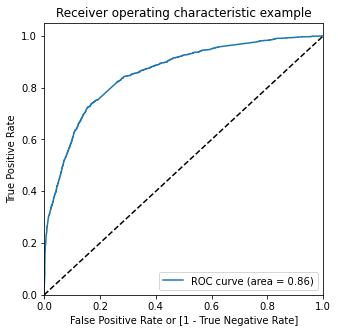

In [75]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Finding the optimal cutoff point

In [76]:
# Creating probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.109619,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.683949,1012,1,1,1,1,1,1,1,1,0,0,0
2,0,0.313805,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.461160,4750,0,1,1,1,1,1,0,0,0,0,0
4,1,0.810699,7987,1,1,1,1,1,1,1,1,1,1,0


In [77]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.498347  0.983647  0.194366
0.2   0.2  0.700835  0.896157  0.578489
0.3   0.3  0.767123  0.827065  0.729577
0.4   0.4  0.796253  0.706868  0.852241
0.5   0.5  0.790584  0.639002  0.885531
0.6   0.6  0.777043  0.558872  0.913700
0.7   0.7  0.758621  0.467294  0.941101
0.8   0.8  0.734215  0.360998  0.967990
0.9   0.9  0.695009  0.218316  0.993598


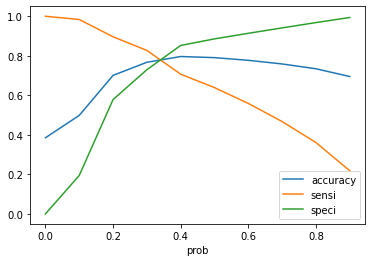

In [78]:
# Plotting curve to find the optimal probability cutoff
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In the above graph we can observe that the accuracy, sensitivity and specificity are merging at around 0.3. Hence we will take 0.3 as the probability cutoff

In [79]:
# Predicting the model again using 0.3 as the cutoff
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.109619,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.683949,1012,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.313805,9226,0,1,1,1,1,0,0,0,0,0,0,1
3,1,0.461160,4750,0,1,1,1,1,1,0,0,0,0,0,1
4,1,0.810699,7987,1,1,1,1,1,1,1,1,1,1,0,1


In [80]:
# Calculation probability and lead score for train data
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.109619,3009,0,11
1,0,0.683949,1012,1,68
2,0,0.313805,9226,1,31
3,1,0.461160,4750,1,46
4,1,0.810699,7987,1,81


In [81]:
# Checking if 80% of the customers have converted
checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    2023
0     423
Name: final_Predicted, dtype: int64

In [82]:
2023/float(2023+423)

0.8270645952575634

We can observe here that more than 80% have converted

In [83]:
# Checking overall metrics once again
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7671232876712328

In [84]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2849, 1056],
       [ 423, 2023]], dtype=int64)

In [85]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [86]:
# Sensitivity
print(TP / float(TP+FN))
# Specificity
print(TN / float(TN+FP))
# Recall
print(TP / float(TP+FN))
# Precision
print(TP / float(TP+FP))

0.8270645952575634
0.7295774647887324
0.8270645952575634
0.6570315037349789


## Deploying model on test data

In [87]:
# Scaling the test data features
X_test[num_vars] = scaler.transform(X_test[num_vars])
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,"Specialization_Banking, Investment And Insurance",Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai
3271,0.102194,-0.600595,0,0,0,0,0,0,0,0,0,0,0,0
1490,0.295588,1.887326,1,0,0,0,0,0,0,0,0,0,1,1
7936,-0.284595,-0.752879,0,0,0,0,0,0,0,0,0,0,0,0
4216,-0.671384,-0.888650,0,1,0,1,0,0,0,0,0,0,0,1
3830,0.875771,-0.587751,1,0,0,0,0,0,0,0,0,0,0,0


In [88]:
# Adding constant before prediction
X_test_sm = sm.add_constant(X_test)

In [89]:
# Predicting the data
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.066148
1490    0.973036
7936    0.054051
4216    0.702433
3830    0.047168
1800    0.689322
6507    0.156796
4821    0.381282
4223    0.867258
4714    0.119969
dtype: float64

In [90]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.066148
1490,0.973036
7936,0.054051
4216,0.702433
3830,0.047168


In [91]:
y_test_df = pd.DataFrame(y_test)

In [92]:
# Changing index as Lead Index
y_test_df['Lead Index'] = y_test_df.index

In [93]:
# Removing index for both dataframes to join them 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [94]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,Lead Index,Converted_Prob
0,0,3271,0.066148
1,1,1490,0.973036
2,0,7936,0.054051
3,1,4216,0.702433
4,0,3830,0.047168


In [95]:
# Predicting the values based on 0.3 as cutoff that we calculated using train data
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final['Conversion_Prob%'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100,2))

# Let's see the head
y_pred_final.head()

,Converted,Lead Index,Converted_Prob,final_predicted,Conversion_Prob%
0,0,3271,0.066148,0,6.61
1,1,1490,0.973036,1,97.30
2,0,7936,0.054051,0,5.41
3,1,4216,0.702433,1,70.24
4,0,3830,0.047168,0,4.72


In [96]:
# Checking accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7649651120088138

### Evaluation metrics on test data

In [97]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1275,  459],
       [ 181,  808]], dtype=int64)

In [98]:
TP_test = confusion_test[1,1] # true positive 
TN_test = confusion_test[0,0] # true negatives
FP_test = confusion_test[0,1] # false positives
FN_test = confusion_test[1,0] # false negatives

In [99]:
# Sensitivity
print(TP_test / float(TP_test + FN_test))
# Specificity
print(TN_test / float(TN_test + FP_test))
# Recall
print(TP_test / float(TP_test + FN_test))
# Precision
print(TP_test / float(TP_test + FP_test))

0.8169868554095046
0.7352941176470589
0.8169868554095046
0.6377269139700079


In [100]:
# Checking if 80% of the customers have converted
checking_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    808
0    181
Name: final_predicted, dtype: int64

In [101]:
808/float(808+181)

0.8169868554095046

We can observe here that we have good sensitivity for the model with more than 80% conversion rate. Hence we have created the model required for the company.

In [102]:
# Checking the top 3 features
rfe = RFE(logreg,n_features_to_select=3)

rfe = rfe.fit(X_train_rfe,y_train)

col= X_train_rfe.columns[rfe.support_]

X_train_rfe_final = X_train_rfe[col]

X_train_rfe_final.columns

Index(['Lead Origin_Lead Add Form',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [103]:
# Let's see what are the top 3 original features that can be selected
rfe = RFE(logreg,n_features_to_select=4)

rfe = rfe.fit(X_train_rfe,y_train)

col= X_train_rfe.columns[rfe.support_]

X_train_rfe_final = X_train_rfe[col]

X_train_rfe_final.columns

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')